
# Recommendation Systems Introduction

* Recommendation systems are one on the most valuable applicatins of Machine Learning.
* Amazon attributes 20% their 221.60 billion dollars of their yearly revenues to recommendation.
* Recommendation systems can use explicit and implict data.
    - A user rating for a product or movie is explicit.
    - Buying/watched history for a user is implicit.
    
![alt text](RecMatrix.png "The Recommender Matrix")



# Exploring the dataset

In [1]:
# First lets just see an example algorithm run on movielens.

import os
import csv
import sys
import re
from collections import defaultdict
import numpy as np
import pandas as pd

ratingsFile = 'ratings.csv'
moviesFile = 'movies.csv'

rdf = pd.read_csv(ratingsFile,header=0)
print('Head of ratings csv')
print(rdf.shape)
rdf.head()

Head of ratings csv
(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [2]:
mdf = pd.read_csv(moviesFile,header=0)
print('Head of movies csv')
print(mdf.shape)
mdf.head()

Head of movies csv
(9125, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
dftags = pd.read_csv("tags.csv")
dftags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [4]:
#get a list of the features within the dataset
print("Movie : ", mdf.columns,end="\n\n")
print("Rating : ", rdf.columns,end="\n\n")
print("Tags : ", dftags.columns,end="\n\n")

mdf.info()
rdf.info()
dftags.info()

Movie :  Index(['movieId', 'title', 'genres'], dtype='object')

Rating :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Tags :  Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFram

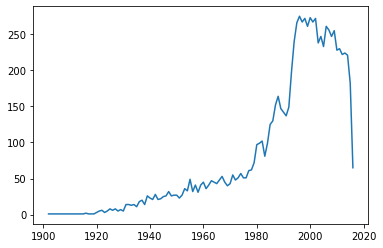

In [5]:
years = []

for i in range(0,mdf.shape[0]):
    tList = mdf['title'][i].split('(')
    if len(tList) > 1:
        curYear = tList[-1][:4]
        years.append(int(curYear))
        
#print(years)
# importing the module
import collections
import matplotlib.pyplot as plt

# Sorting the list, and then using Counter to find frequency of elements
years.sort()
frequency = collections.Counter(years)

# printing the frequency
plt.plot(frequency.keys(), frequency.values())

In [6]:
# Seperate the Geners Column and Encoding them with One-Hot-Encoding Method.
genres=[]
for i in range(len(mdf.genres)):
    for x in mdf.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

print(len(genres))
print(genres)
for x in genres:
    mdf[x] = 0
for i in range(len(mdf.genres)):
    for x in mdf.genres[i].split('|'):
        mdf[x][i]=1
mdf.head()

20
['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'Documentary', 'IMAX', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']


<ipython-input-6-79d752ac773e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf[x][i]=1


,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,Documentary,IMAX,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mdf.drop(columns='genres',inplace=True)
mdf.head()

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Horror,Mystery,Sci-Fi,Documentary,IMAX,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dictionary
* Dictionaries are used to store data values in key:value pairs.

* A dictionary is a collection which is ordered*, changeable and do not allow duplicates.

* Dictionaries are written with curly brackets, and have keys and values:

thisdict = {
  "brand": "Honda",
  "model": "Accord",
  "year": 1964
}

print(thisdict)

Adventure    				1117
Animation    				447
Children    				583
Comedy    				3315
Fantasy    				654
Romance    				1545
Drama    				4365
Action    				1545
Crime    				1100
Thriller    				1729
Horror    				877
Mystery    				543
Sci-Fi    				792
Documentary    				495
IMAX    				153
War    				367
Musical    				394
Western    				168
Film-Noir    				133
(no genres listed)    				18


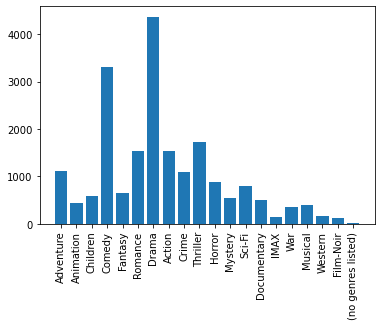

In [8]:
genreCount={}
for i in mdf.columns[2:23]:
    genreCount[i]=mdf[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,genreCount[i]))

plt.bar(height=genreCount.values(),x=genreCount.keys())
plt.xticks(range(len(genreCount.keys())), genreCount.keys(), rotation='vertical')
plt.show()

In [9]:
ratingMean=rdf.groupby('movieId').rating.mean()
t = mdf[['movieId', 'title']]
mdfNew = pd.merge(t,ratingMean,how='right',on='movieId')
mdfNew['rating'].fillna('0',inplace=True)
print(mdfNew)

      movieId                                              title    rating
0           1                                   Toy Story (1995)  3.872470
1           2                                     Jumanji (1995)  3.401869
2           3                            Grumpier Old Men (1995)  3.161017
3           4                           Waiting to Exhale (1995)  2.384615
4           5                 Father of the Bride Part II (1995)  3.267857
...       ...                                                ...       ...
9061   161944              The Last Brickmaker in America (2001)  5.000000
9062   162376                                    Stranger Things  4.500000
9063   162542                                      Rustom (2016)  5.000000
9064   162672                                Mohenjo Daro (2016)  3.000000
9065   163949  The Beatles: Eight Days a Week - The Touring Y...  5.000000

[9066 rows x 3 columns]


In [10]:
userCount = rdf.groupby('movieId').userId.count()
mdfNew = pd.merge(mdfNew,userCount,how='right',on='movieId')

mdfNew = mdfNew.sort_values(['userId','rating'],ascending=False)
mdfNew.head(100)

,movieId,title,rating,userId
321,356,Forrest Gump (1994),4.054252,341
266,296,Pulp Fiction (1994),4.256173,324
284,318,"Shawshank Redemption, The (1994)",4.487138,311
525,593,"Silence of the Lambs, The (1991)",4.138158,304
232,260,Star Wars: Episode IV - A New Hope (1977),4.221649,291
...,...,...,...,...
6892,58559,"Dark Knight, The (2008)",4.235537,121
962,1206,"Clockwork Orange, A (1971)",4.000000,121
1906,2396,Shakespeare in Love (1998),3.966942,121
1367,1732,"Big Lebowski, The (1998)",3.995833,120


In [11]:
#Find the user with highest no.of. movie ratings and that users mean rating. 
movieCount = rdf.groupby('userId',as_index=False).movieId.count()
ratingMean = rdf.groupby('userId',as_index=False).rating.mean()
UserMovie = pd.merge(movieCount,ratingMean,how='outer',on='userId')
UserMovie.describe()
UserMovie.head()

,userId,movieId,rating
0,1,20,2.550000
1,2,76,3.486842
2,3,51,3.568627
3,4,204,4.348039
4,5,100,3.910000


In [12]:
# From below we found that userId - 546 has given the Highest no.of Ratings with 
# 2391 and an Average of 3.37 Stars followed by userId-563 with 1868 Ratings and 
# an Average of 3.55 Stars and so on …
UserMovie.sort_values('movieId',ascending=False)

,userId,movieId,rating
546,547,2391,3.366792
563,564,1868,3.552463
623,624,1735,2.894236
14,15,1700,2.621765
72,73,1610,3.374224
...,...,...,...
295,296,20,3.975000
288,289,20,3.675000
248,249,20,3.600000
220,221,20,2.775000
